In [8]:
%run 'utils/imports_4.ipynb'

## Regresja liniowa 

Model regresji to metoda statystyczna służąca estymowaniu liniowych zależności pomiędzy dwoma lub więcej zmiennymi. Mając więc zbiór danych testowych *x*, celem systemu jest nauka modelu, który opisuje dane wejściowe pod kątem zależności z ich stanem *y*. Innymi słowy, posiadając znane parametry, za pomocą regresji liniowej można wyestymować wartość innego, nieznanego parametru. 

Poprzednie algorytmy - sieci bayesowskie, SVM, k-najbliższych sąsiadów - przedstawione zostały do zadania klasyfikacji, czyli przypasowania wektora atrybutów do jednego stanu spośród dostępnych stanów atrybutu nazywanego klasą. W regresji liniowej atrybutem decyzyjnym jest liczba rzeczywista.

Aby przedstawić zasadę działania regresji liniowej na przykładzie, jako zbiór testowy użyty będzie zbiór `boston` [[1](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)], który zawiera informacje o cenach domów w okolicy Bostonu wraz z wartościami czynników, które mogą na te ceny wpływać. 

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

Dane w postaci tabeli prezentują się następująco:

In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Poniższy wykres przedstawia zależność pomiędzy procentem populacji o niższym statusie w okolicy mieszkania do ceny mieszkania. Można zauważyć trend taki, że im mniej mieszkańców o niższym statusie społecznym, tym droższe jest mieszkanie:

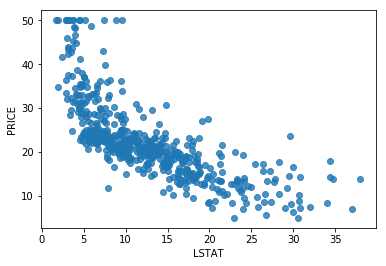

In [4]:
sns.regplot(x='LSTAT', y='PRICE', data=bos, fit_reg=False)

Trenowanie modelu regresji liniowej polega na znalezieniu linii estymującej wartość wyjściową na podstawie wartości wejściowych. Rozwiązywane jest następujące równanie:

$$y_{i} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n} + \epsilon_{i}$$

Dla jednego atrybutu wejściowego `n` równe jest 1, natomiast rozwiązanie równanie ma następującą interpretację graficzną:

<img src="img/linear_regression.png" alt="Linear regression" style="height: 350px;"/>

Rozwiązanie powyższego równania jest realizowane w bibliotece sci-kit za pomocą funkcji `fit()`: 

In [5]:
X = bos.LSTAT.values.reshape((bos.LSTAT.shape[0], 1))
linear_regression_model = LinearRegression()
linear_regression_model.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Wartości `y` dla zbioru `X` mogą zostać przewidziane przez wytrenowany model regresji liniowej za pomocą funkcji `predict()`. 

Na poniższym wykresie naniesione zostały niebieskie kropki, które reprezentują zależność ceny mieszkań od ceny w zbiorze trenującym, oraz czerwoną linię reprezentującą wartości przewidziane przez model regresji liniowej.

Text(0.5,1,'Ceny vs Przewidziane ceny mieszkań')

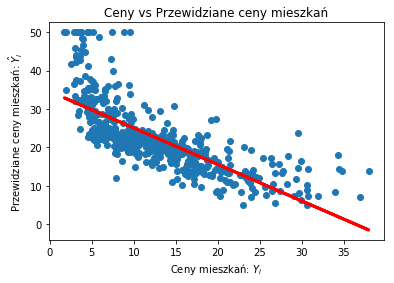

In [6]:
predicted = linear_regression_model.predict(X)
plt.scatter(X, bos.PRICE)
plt.plot(X, predicted, color='red', linewidth=3)

plt.xlabel("Ceny mieszkań: $Y_i$")
plt.ylabel("Przewidziane ceny mieszkań: $\hat{Y}_i$")
plt.title("Ceny vs Przewidziane ceny mieszkań")

Jak widać, ogólny trend został zachowany, jednak wiele wartości odbiega mocno od czerwonej linii. Można spodziewać się, że wartość błędu średniokwadratowego będzie dość wysoka:

In [7]:
mseFull = np.mean((bos.PRICE - linear_regression_model.predict(X)) ** 2)
mseFull

38.48296722989416

W poprzednich skryptach przedstawione zostały algorytmy, których zadaniem była klasyfikacja na podstawie danych trenujących dostarczonych w plikach ARFF. Tym razem nie można zastosować modelu regresji liniowej do zadania klasyfikacji, dlatego część z k-krotną walidacją krzyżową na plikach ARFF została pominięta.